In [1]:
cd ..

/Users/nguyen/projects/ab-framework


In [2]:
import scipy.stats as scs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.style.use('ggplot')

In [3]:
z = scs.norm(0, 1)

In [4]:
z.ppf(0.8)

0.8416212335729143

In [5]:
z.ppf(.975)

1.959963984540054

In [6]:
z = scs.norm()

In [7]:
def zplot(cdf=0.95, align='center'):
    """Plots a z distribution with common annotations
    
    Example:
        zplot(0.95)
        
        zplot(0.95, align='left')
    
    Parameters:
        cdf (float): The area under the standard normal distribution curve. 
        align (str): The area under the curve can be aligned to the center (default) or to the left.
            Supported: 'left' or 'center'
        
    Returns:
        None: A plot of the normal distribution with annotations showing the area under the curve and the boundaries of the area.
    """
    fig = plt.figure(figsize=(12,6))
    ax = fig.subplots()
    norm = scs.norm()

    x = np.linspace(-5, 5, 1000)
    y = norm.pdf(x)
    
    ax.plot(x, y)
    

    
    if align == 'center':
    
        CIa = norm.ppf(0.5 - cdf / 2)
        CIb = norm.ppf(0.5 + cdf / 2)
        ax.vlines(CIb, 0, norm.pdf(CIb), color='grey', linestyle='--', label=CIb)
        ax.vlines(CIa, 0, norm.pdf(CIa), color='grey', linestyle='--', label=CIa)


        fill_x = np.linspace(CIa, CIb, 1000)

        ax.fill_between(x, 0, y, color='grey', alpha='0.25', where=(x > CIa) & (x < CIb))
        plt.xlabel('z')
        plt.ylabel('PDF')
        plt.text(CIa, norm.pdf(CIa), "z = {0:.3f}".format(CIa), fontsize=12, rotation=90, va="bottom", ha="right")

    
    elif align == 'left':
        CIb = norm.ppf(cdf)
        ax.vlines(CIb, 0, norm.pdf(CIb), color='grey', linestyle='--', label=CIb)
        fill_x = np.linspace(-5, CIb, 1000)
        ax.fill_between(x, 0, y, color='grey', alpha='0.25', where=x < CIb)
        
    else:
        raise ValueError('align must be set to "center"(default) or "left"')

    plt.text(CIb, norm.pdf(CIb), "z = {0:.3f}".format(CIb), fontsize=12, rotation=90, va="bottom", ha="left")
    plt.text(0, 0.1, "area = {0:.3f}".format(cdf), fontsize=12, ha='center')
    plt.xlabel('z')
    plt.ylabel('PDF')
    plt.show()

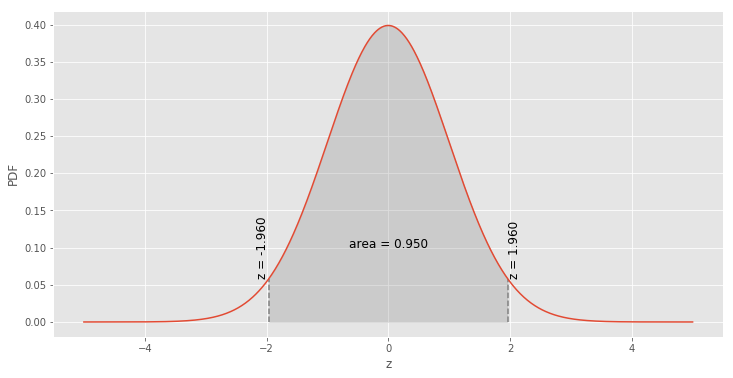

In [8]:
zplot(0.95)